In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix

In [2]:
diabetes_data = pd.read_excel("./content/diabetes_dataset.xlsx")

In [3]:
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


Correlation Matrix is : (22, 22)


<Axes: >

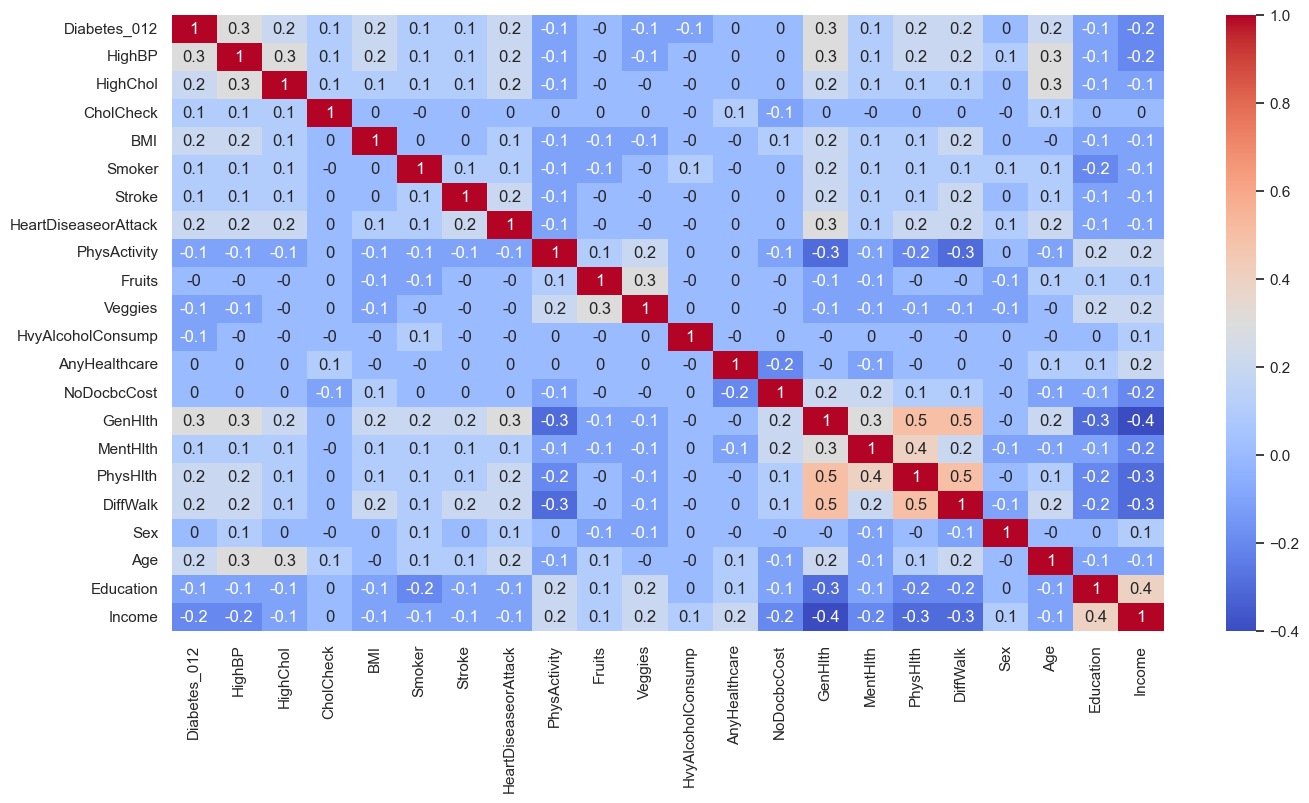

In [4]:
corr_matrix = diabetes_data.corr()
print("Correlation Matrix is : {}".format(corr_matrix.shape))
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr_matrix.round(1), annot = True, fmt='.2g',cmap= 'coolwarm')

In [39]:
diabetes_data.dropna(inplace = True)

X_data = diabetes_data.drop('Diabetes_012', axis = 1) # features
y_data = diabetes_data["Diabetes_012"]

fit_feature = SelectKBest()
fit_feature.fit(data_x, data_y)

score_col = pd.DataFrame(fit_feature.scores_, columns=['score_value'])
name_col = pd.DataFrame(data_x.columns,columns=['feature_name'])
top_feature = pd.concat([name_col, score_col], axis=1).nlargest( 15,'score_value')

top_feature['score_value'] = top_feature['score_value']/top_feature['score_value'].sum()

X_data = diabetes_data[top_feature['feature_name']]
y_data = diabetes_data["Diabetes_012"]

top_feature

,feature_name,score_value
13,GenHlth,0.192566
0,HighBP,0.152297
3,BMI,0.101565
16,DiffWalk,0.100948
1,HighChol,0.088397
18,Age,0.068434
6,HeartDiseaseorAttack,0.063938
15,PhysHlth,0.061205
20,Income,0.058729
19,Education,0.033699


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [45]:

clf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=20, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=250)

In [46]:
print(f"train = {clf.score(X_train, y_train)}")
print(f"test = {clf.score(X_test, y_test)}")

train = 0.9445413513087354
test = 0.8479777672658467


Confusion Matrix for Random Forest Classifier


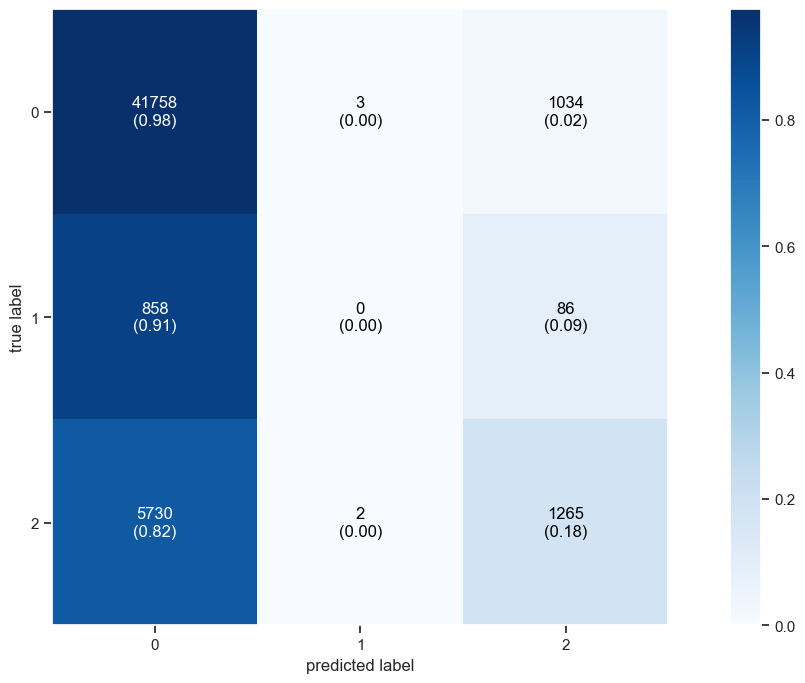

In [48]:
print('Confusion Matrix for Random Forest Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,clf.predict(X_test))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()